In [36]:
import pandas as pd
import numpy as np

from random import randint

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from os.path import join
from PIL import Image

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [44]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("GPU Devices: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)
# For some reason Tensor is not finding my GPU

In [65]:

train_labels = []
train_samples = []

for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [66]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
#Shuffle to get rid of any imposed order from generation
train_labels,train_samples = shuffle(train_labels,train_samples)


In [45]:
# Normalize data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
# just a formality, the fit transform funciton does not accept 1D data by default
# beacause our data is 1D we need to reshape it to fit the transform funciton
scaled_trained_samples = scaler.fit_transform(train_samples.reshape(-1,1))
scaled_trained_samples.shape


(2100, 1)

In [59]:
model = Sequential([
    # (1,) means a 2d grid, (28,28) could be a grayscale image
    # First hidden layer how the model knows what input data shape is
    # Units are the number of Neuron connections, this is arbitrary, but usually complex data needs more neurons
    #Dense just means every neuron conects to each other

    
    Input(shape=(1,)),
    # Dense(units=16, input_shape=(1,), activation="relu"), 
    # got a warning for the code right above, apparently models prefer you pass the input shape explicitly like so.
    
    #Relu is Rectified Linear Unit
    Dense(units=16, activation="relu"),
    #positive numbers remain unchained but negative numbers become zero. Introduces nonlinearity. Less prone to the vanishing gadient problem
    Dense(units=32, activation="relu"), # hidden layer
    #softmax converts scors into probabilities. Each output becomes probability between 0 and 1, all the probabilities sum to 1
    Dense(units=2, activation="softmax") # output layer, 2 units correspond to 2 output classes
])

#This just creates the model, it is not trained yet.

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Prepares the Model
# Adam is an optimizer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['Accuracy'])


In [62]:
#fit funciton, x and y need to be the same type of arrays, ideally numpy
#batch is how many samples are included in 1 batch, epochs mean that the process trains on all of the data 30 times.
#Shuffle is defualt set to True, so no order exists. Verbose- output 1 is less verbose, 0 is none.
model.fit(x=scaled_trained_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)
#Validaiton split automatically splits out a training set. the validaiton no longer contains training data
# the reason we shuffle the training data before, is because the split occurs before the shuffle does on model.fit, and the validaiton may never be shuffled


Epoch 1/30
189/189 - 1s - 7ms/step - Accuracy: 0.3751 - loss: 0.7076 - val_Accuracy: 0.5048 - val_loss: 0.6933
Epoch 2/30
189/189 - 0s - 2ms/step - Accuracy: 0.5619 - loss: 0.6798 - val_Accuracy: 0.6048 - val_loss: 0.6652
Epoch 3/30
189/189 - 0s - 2ms/step - Accuracy: 0.6529 - loss: 0.6562 - val_Accuracy: 0.6429 - val_loss: 0.6470
Epoch 4/30
189/189 - 0s - 2ms/step - Accuracy: 0.6810 - loss: 0.6414 - val_Accuracy: 0.6905 - val_loss: 0.6317
Epoch 5/30
189/189 - 0s - 2ms/step - Accuracy: 0.7058 - loss: 0.6261 - val_Accuracy: 0.7333 - val_loss: 0.6153
Epoch 6/30
189/189 - 0s - 2ms/step - Accuracy: 0.7243 - loss: 0.6087 - val_Accuracy: 0.7524 - val_loss: 0.5934
Epoch 7/30
189/189 - 0s - 2ms/step - Accuracy: 0.7688 - loss: 0.5811 - val_Accuracy: 0.7905 - val_loss: 0.5594
Epoch 8/30
189/189 - 0s - 2ms/step - Accuracy: 0.8069 - loss: 0.5497 - val_Accuracy: 0.8143 - val_loss: 0.5282
Epoch 9/30
189/189 - 0s - 2ms/step - Accuracy: 0.8302 - loss: 0.5208 - val_Accuracy: 0.8286 - val_loss: 0.4978
E

In [55]:
#using a validation set lest us see how well teh model is doing on data not included in the treaining set.
#overfitting is when the model has learned the training data really well, but does not work well on real data
# How to spot overfitting by deeplizard
#If validation accuracy is falling behind training accuracy, it means we have an overfitting problem

In [69]:
# Using test data helps validate our model against data it has not seen before. you should prepare your 
# test data the same way you would prepare your training data. we are using the same code at 20% of data
test_labels = []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
#Shuffle to get rid of any imposed order from generation
test_labels,test_samples = shuffle(test_labels,test_samples)
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [70]:
# Predict on model
predictions = model.predict(x=scaled_test_samples, batch_size=10,verbose=0)

In [71]:
for i in predictions:
    print(i)

[0.07108613 0.9289139 ]
[0.04491737 0.9550826 ]
[0.9671212  0.03287885]
[0.96554327 0.03445673]
[0.96435016 0.03564991]
[0.95137894 0.04862107]
[0.9668651  0.03313484]
[0.84177804 0.15822195]
[0.058058   0.94194204]
[0.9670072  0.03299277]
[0.9670492  0.03295087]
[0.9587169  0.04128307]
[0.14512417 0.85487586]
[0.96459186 0.03540813]
[0.82469493 0.17530502]
[0.96622413 0.03377584]
[0.76483834 0.2351616 ]
[0.17838849 0.82161146]
[0.69217277 0.30782723]
[0.85748416 0.14251584]
[0.0551695  0.94483054]
[0.39651215 0.6034878 ]
[0.03844746 0.9615525 ]
[0.11720979 0.8827902 ]
[0.90776753 0.09223248]
[0.9668651  0.03313484]
[0.16106375 0.8389363 ]
[0.07474209 0.92525786]
[0.05241666 0.94758326]
[0.11720979 0.8827902 ]
[0.42629406 0.57370585]
[0.058058   0.94194204]
[0.5486305 0.4513695]
[0.9650707  0.03492932]
[0.9659799  0.03402008]
[0.2620816  0.73791844]
[0.42629406 0.57370585]
[0.9668651  0.03313484]
[0.8061921  0.19380787]
[0.9401615  0.05983848]
[0.058058   0.94194204]
[0.90776753 0.0922

In [72]:
# get indec os prediciton with highest probability.
rounded_predictions = np.argmax(predictions, axis=1)

In [73]:
for i in rounded_predictions:
    print(i)

1
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
1
0
0
0
1
1
0
0
0
1
0
0
0
0
0
1
1
0
1
1
1
0
0
1
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
0
0
1
1
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
1
0
1
0
0
0
1
1
0
1
0
0
0
1
1
0
0
1
0
0
1
0
0
1
0
1
0
1
0
1
1
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
0
1
1
0
1
0
1
1
0
1
1
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
0
1
0
0
0
1
1
1
0
1
0
0
0
1
1
1
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
0
0
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
0
0
1
0
1
0
1
0
0
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
1
0
0
0
1
1


# Confusion matrix to visualize the results

In [75]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [79]:
# test labels are labeled against true labels
# Rounded predictions is from above.
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [84]:

# this function is apparently taken from scikitlearn's website, though it says its depreciated
# From website:
"""
Deprecated since version 1.0: plot_confusion_matrix is deprecated in 1.0 and will be removed in 1.2. 
Use one of the following class methods: from_predictions or from_estimator.
"""
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'
    """

    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[: ,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

    

Confusion matrix without normalization
[[192  18]
 [ 10 200]]


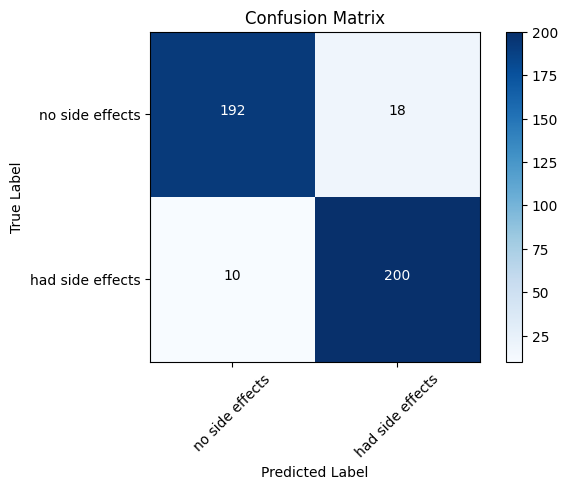

In [100]:
cm_plot_labels = ["no side effects","had side effects"]
plot_confusion_matrix(cm=cm,classes=cm_plot_labels, title="Confusion Matrix", normalize=False)

# the blue part of the confusion matrix is the accuracy.

# Saving and loading a Keras model.

In [101]:
import os.path
model_path = join("models","medical_trail_model.keras")
if os.path.isfile(model_path) is False:
    model.save(model_path)



In [102]:
from tensorflow.keras.models import load_model
new_model = load_model(join('models','medical_trail_model.keras'))

C:\Users\joshu\OneDrive\Documents\Dev\Jupyter\jupEnv\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [103]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,286 (5.03 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 644 (2.52 KB)

In [98]:
new_model.get_weights()

[array([[ 0.41677913,  0.23847291, -0.05210888,  0.5673004 , -0.03770941,
          0.50798786,  0.5491422 , -0.13627225,  0.19702995,  0.3543853 ,
          0.01182572, -0.5793796 , -0.15187538,  0.6725402 ,  0.63498867,
         -0.12027594]], dtype=float32),
 array([-0.05881866, -0.07974202,  0.        , -0.12759256,  0.        ,
        -0.14096907, -0.13601321,  0.        ,  0.30639106, -0.0315073 ,
        -0.01217156,  0.        ,  0.        , -0.15451406, -0.13817383,
         0.        ], dtype=float32),
 array([[ 4.03184108e-02, -1.12877958e-01,  1.16737269e-01,
          1.59442425e-05,  1.73169360e-01, -2.01280117e-01,
         -1.57399997e-02, -5.26214056e-02,  2.59852320e-01,
          3.40529352e-01,  3.46403450e-01, -3.37698489e-01,
          4.75303121e-02, -3.62405390e-01,  4.10073698e-02,
          4.04361188e-02, -1.22314066e-01,  1.02812417e-01,
          3.77903461e-01,  5.15853286e-01, -1.09412186e-01,
          5.64134903e-02,  2.02135354e-01,  2.27297336e-01,
 